In [ ]:
from loss_function import *
from main import *
from optimizer import *
#from test import *
import csv

In [ ]:
diabetes_csv = csv.reader(open("C:/Users/J/Dropbox/Doodle/final_project/datasets/diabetes.csv"))
header_diabetes = diabetes_csv.__next__()

diabetes_raw = list(d for d in diabetes_csv)
diabetes_feature = [[float(di) for di in d[:-1]] for d in diabetes_raw]
diabetes_target = list([int(d[-1]) for d in diabetes_raw])

In [ ]:
diabetes = Model(diabetes_feature, diabetes_target, LogisticRegression)

In [ ]:
diabetes.loss_function.accuracy(diabetes.beta)

In [ ]:
diabetes.train()

In [ ]:
#beta_587 = diabetes.beta # 587
beta_587

In [ ]:
boston_ = csv.reader(open("C:/Users/J/Dropbox/Doodle/final_project/datasets/boston.csv"))
header_boston = boston_.__next__()

boston_raw = list(d for d in boston_)
boston_feature = [[float(di) for di in d[:-1]] for d in boston_raw]
boston_target = list([float(d[-1]) for d in boston_raw])

In [ ]:
car_ = csv.reader(open("car.csv"))
header_car = car_.__next__()

car_raw = list(d for d in car_)
car_feature = [[float(di) for di in d[:-1]] for d in car_raw]
car_target = list([float(d[-1]) for d in car_raw])

In [ ]:
car = Model(car_feature, car_target, LinearRegression)

In [ ]:
car.beta

In [ ]:
car.loss_function.full_loss(car.beta)

In [ ]:
sum((car.target - (sum(car.target) / car.target.shape)) ** 2)

In [ ]:
car.train()

In [ ]:
boston = Model(boston_feature, boston_target, LinearRegression)

In [ ]:
boston.batch_normalize()

In [ ]:
boston.loss_function.accuracy(boston.beta)

In [ ]:
boston.loss_function.full_loss(boston.beta)

In [ ]:
boston.train()

In [ ]:
beta = boston.beta[:]
for x_i, y_i in zip(boston.feature, boston.target):
    print(2 * np.array(list([1] + list(x_i))) * (sum(x_i * beta[1:]) + beta[0] - y_i))

In [ ]:
print(2 * np.array(list([1] + list(boston.feature[1]))) * (sum(boston.feature[1] * beta[1:]) + beta[0] - boston.target[1]))

In [ ]:
np.array(list([1] + list(boston.feature[1])))

In [ ]:
boston.loss_function.full_loss(boston.beta)

In [ ]:
352718718.6365987 - 242224384.43047115

In [ ]:
boston.beta

In [ ]:
from test import *

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from optimizer import *
from math import exp
import time

In [ ]:
def f(x, y):
    return x * np.exp(-x * x - y * y)


def df(x, y):
    return (1 - 2 * x ** 2) * exp(-x ** 2 - y ** 2), -2 * x * y * exp(-x ** 2 - y ** 2)


init_pos = (.5, .5)
params = np.array([_ for _ in init_pos])
grads = np.array([0, 0])

optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=1)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.09)
optimizers["Nesterov"] = Nesterov(lr=0.1)

optimizer = optimizers["AdaGrad"]
x_history, y_history = [], []
params = np.array([_ for _ in init_pos])

x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
mask = Z > 16
Z[mask] = 0



for i in range(150):
    x_history.append(params[0])
    y_history.append(params[1])
    #print(x_history[i], y_history[i])
    grads = np.array(df(params[0], params[1]))
    optimizer.update(params, grads)


plt.ylim(-5, 5)
plt.xlim(-2.5, 2.5)
plt.plot(0, 0, '+')
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x_history, y_history, 'o-', color="red")
plt.contour(X, Y, Z)

plt.show()
    #time.sleep(1)
    
print(params)

In [ ]:
optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=1)
optimizers["Momentum"] = Momentum(lr=0.01)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.09)
optimizers["Nesterov"] = Nesterov(lr=0.01)

In [ ]:
def f(x, y):
    return x * np.exp(-x * x - y * y)


def df(x, y):
    return (1 - 2 * x ** 2) * exp(-x ** 2 - y ** 2), -2 * x * y * exp(-x ** 2 - y ** 2)

init_pos = (.5, 0.1)
params = np.array([_ for _ in init_pos])
grads = np.array([0, 0])

optimizer = optimizers["Nesterov"]
x_history, y_history = [], []
params = np.array([_ for _ in init_pos])

x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
mask = Z > 16
Z[mask] = 0

min_pos, min_value = None, float('inf')
iterations_without_movement = 0
trial = 0
while iterations_without_movement < 100:
    x_history.append(params[0])
    y_history.append(params[1])
    value = f(params[0], params[1])
    
    if value < min_value:
        min_pos, min_value = params, value
        iterations_without_movement = 0
        optimizer.lr = 1
    
    else:
        iterations_without_movement += 1
        optimizer.lr *= .9
        
    optimizer.update(params, np.array(df(params[0], params[1])))
    trial += 1
    
plt.ylim(-5, 5)
plt.xlim(-2.5, 2.5)
plt.plot(0, 0, '+')
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x_history, y_history, 'o-', color="red")
plt.contour(X, Y, Z)

plt.show()
print(params)
print(trial)

In [ ]:
target_dict = {i: element for i, element in enumerate(set([1,3,2,'t',1,1,0,1,]))}
target_dict
for i, key in enumerate(target_dict):
    target_dict[key] = [1 if _ == i else 0 for _ in range(3)]
target_dict

In [ ]:
res = dict.fromkeys(set([1,3,2,'t',1,1,0,1,]))
res

In [ ]:
from collections import defaultdict

beta_set = defaultdict()
for i in range(3):
    beta_set[i] = np.random.randn(9 + 1)

In [ ]:
beta_set[1]

In [ ]:
beta_set

Visualization of various SGD methods convergence with some functions
Some options that you can choose are the followings
 * Functions
	 1. f(x, y) = x**2/20 + y**2
	 2. f(x, y) = x * exp(-x**2 -y**2)
Choose a function : 2
You've chose f(x, y) = x * exp(-x**2 -y**2)


 * Optimizers
	 1. Normal Stochastic Gradient Descent(we've done in class
	 2. Momentum SGD
	 3. AdaGrad
	 4. Adam(combination of Momentum SGD and AdaGrad)
	 5. Nesterov
	 6. See them all
	 there are no options of choosing multiple optimizers
	 if you choose between 1 - 4, you will see how they converge time by time
Choose a optimizer : 5
You've chose Nesterov
0.01


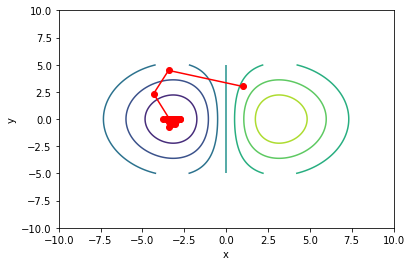

[-3.16227766  0.        ]
1772


In [13]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from optimizer import *
import time
from math import exp


def f(func):
    def f1(x, y):
        return x ** 2 / 20.0 + y ** 2

    def df1(x, y):
        return x / 10, 2 * y

    def f2(x, y):
        return 3 * x * np.exp(-x * x / 20 - y * y / 20)

    def df2(x, y):
        return -0.3*(x**2 - 10) * exp(-0.05*(x**2+y**2)), -0.3*x*y*exp(-0.05*(x**2+y**2))
    
    def f3(x, y):
        return x * y * np.exp(-x * x / 20 - y * y / 20)
    
    def df3(x, y):
        return -0.1*(x**2 - 10) * y * np.exp(-0.05*(x**2+y**2)), -0.1*x*(y**2-10)*np.exp(-0.05*(x**2+y**2))

    return {1: (f1, df1, (-7., 2.), (-10, 10, -10, 10)),
            2: (f2, df2, (1., 3.), (-10, 10, -10, 10)),
           3: (f3, df3, (-1., 2.), (-10., 10., -10., 10.))}[func]


def o(opt):
    if opt is 6:
        optimizers = OrderedDict()
        optimizers["SGD"] = SGD(lr=1)
        optimizers["Momentum"] = Momentum(lr=0.01)
        optimizers["AdaGrad"] = AdaGrad(lr=0.1)
        optimizers["Adam"] = Adam(lr=0.001)
        optimizers["Nesterov"] = Nesterov(lr=0.01)
        return optimizers

    else:
        return {1: SGD, 2: Momentum, 3: AdaGrad, 4: Adam, 5: Nesterov}[opt]()


def plot(functions, optimizer):
    f, df, init_pos = functions[:3]
    params = np.array(list(init_pos))
    x_history, y_history = [], []

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)

    x_lim_left, x_lim_right, y_lim_left, y_lim_right = functions[-1]

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    mask = Z > 16
    Z[mask] = 0

    if type(optimizer) == dict:
        pass
    else:
        min_pos, min_value = None, float('inf')
        iterations_without_movement = 0
        trial = 0
        while iterations_without_movement < 130:
            x_history.append(params[0])
            y_history.append(params[1])
            value = f(params[0], params[1])

            if value < min_value:
                min_pos, min_value = params, value
                iterations_without_movement = 0
                optimizer.lr = 1

            else:
                iterations_without_movement += 1
                optimizer.lr *= .9

            optimizer.update(params, np.array(df(params[0], params[1])))
            trial += 1

        plt.xlim(x_lim_left, x_lim_right)
        plt.ylim(y_lim_left, y_lim_right)
        plt.xlabel("x")
        plt.ylabel("y")

        plt.plot(x_history, y_history, 'o-', color="red")
        plt.contour(X, Y, Z)

        plt.show()
        print(params)
        print(trial)


if __name__ == "__main__":
    print("Visualization of various SGD methods convergence with some functions")
    time.sleep(.5)
    print("Some options that you can choose are the followings")


    print(" * Functions")
    print("\t 1. f(x, y) = x**2/20 + y**2")
    print("\t 2. f(x, y) = x * exp(-x**2 -y**2)")
    func_ = int(input("Choose a function : "))
    print("You've chose " +
          {1: "f(x, y) = x**2/20 + y**2 ",
           2: "f(x, y) = x * exp(-x**2 -y**2)",
          3: " "}[func_])

    print("\n")
    time.sleep(1)

    print(" * Optimizers")
    print("\t 1. Normal Stochastic Gradient Descent(we've done in class")
    print("\t 2. Momentum SGD")
    print("\t 3. AdaGrad")
    print("\t 4. Adam(combination of Momentum SGD and AdaGrad)")
    print("\t 5. Nesterov")
    print("\t 6. See them all")
    print("\t there are no options of choosing multiple optimizers")
    print("\t if you choose between 1 - 4, you will see how they converge time by time")
    opt_ = int(input("Choose a optimizer : "))
    if opt_ == 6:
        pass
    else:
        # 1 by 1
        pass

    print("You've chose " +
          {1: "Normal Stochastic Gradient Descent(we've done in class",
           2: "Momentum SGD",
           3: "AdaGrad",
           4: "Adam(combination of Momentum SGD and AdaGrad",
           5: "Nesterov",
           6: "See them all"}[opt_])

    func = f(func_)
    opt = o(opt_)
    print(opt.lr)
    plot(func, opt)
        

# 